# 차원 축소 시각화 실습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data

### 1.1 Data Load
이 실습에서 사용할 데이터는 손글씨 데이터  
데이터는 `sklearn.datasets`의 `load_digits`를 이용해 받을 수 있음

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
data, target = digits["data"], digits["target"]

In [4]:
data[0], target[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

데이터는 8*8 모양의 이미지

In [6]:
data[0].shape

(64,)

실제로 0~9까지 어떻게 쓰여져 있는지 확인

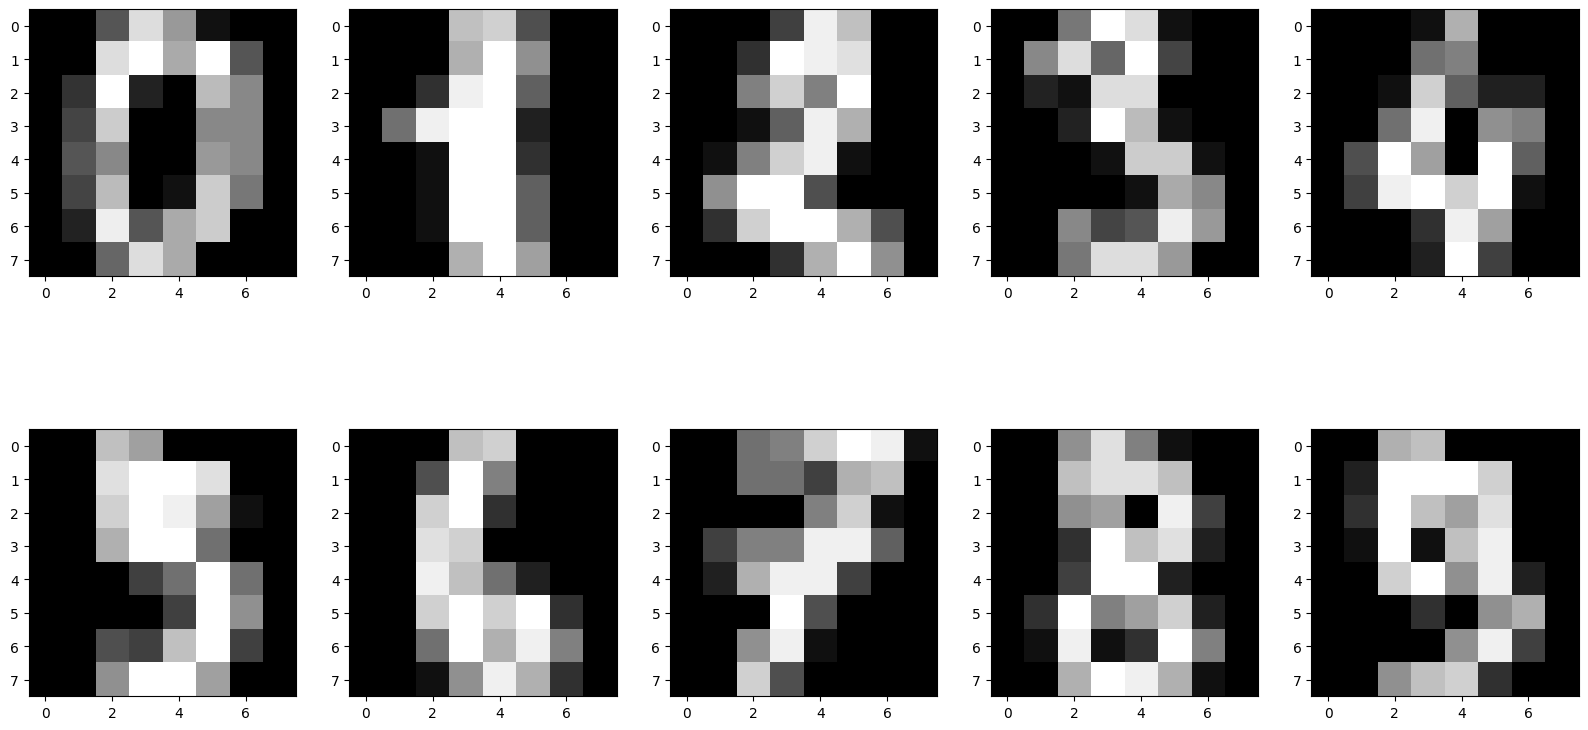

In [7]:
samples = data[:10].reshape(10, 8, 8)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

for idx, sample in enumerate(samples):
  axes[idx//5, idx%5].imshow(sample, cmap="gray")

### 1.2 데이터 정규화  
데이터의 크기에 영향을 받는 PCA를 위해서 데이터를 정규화 하기  

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [10]:
scaled_data = scaler.fit_transform(data)

## PCA

### 2.1 학습
PCA는 `sklearn.decomposition`의 `PCA`로 사용할 수 있음

In [11]:
from sklearn.decomposition import PCA

pca = PCA()

In [12]:
pca.fit(scaled_data)

PCA()

### 2.2 설명된 분산
PCA는 첫번쨰 주성분이 가장 크며 갈수록 작아짐 (첫번째 주성분의 분산이 가장 큼)

In [13]:
pca.explained_variance_

array([7.34477606e+00, 5.83549054e+00, 5.15396118e+00, 3.96623597e+00,
       2.96634520e+00, 2.57204442e+00, 2.40600941e+00, 2.06867355e+00,
       1.82993314e+00, 1.78951739e+00, 1.69784616e+00, 1.57287889e+00,
       1.38870781e+00, 1.35933609e+00, 1.32152536e+00, 1.16829176e+00,
       1.08368678e+00, 9.99778617e-01, 9.74382931e-01, 9.08912418e-01,
       8.22719264e-01, 7.76310139e-01, 7.11556753e-01, 6.45523648e-01,
       5.95273988e-01, 5.76501797e-01, 5.26731552e-01, 5.10636301e-01,
       4.86863813e-01, 4.55601071e-01, 4.42851552e-01, 4.22300863e-01,
       3.99106303e-01, 3.91101111e-01, 3.60945168e-01, 3.48603059e-01,
       3.19596300e-01, 2.94066271e-01, 2.76922851e-01, 2.58273004e-01,
       2.47830286e-01, 2.42356600e-01, 2.17581996e-01, 2.07995927e-01,
       2.00090902e-01, 1.89835165e-01, 1.76128942e-01, 1.68752359e-01,
       1.58184741e-01, 1.43114274e-01, 1.33210813e-01, 1.24263708e-01,
       1.19328984e-01, 1.11886547e-01, 1.02504338e-01, 9.84087608e-02,
      

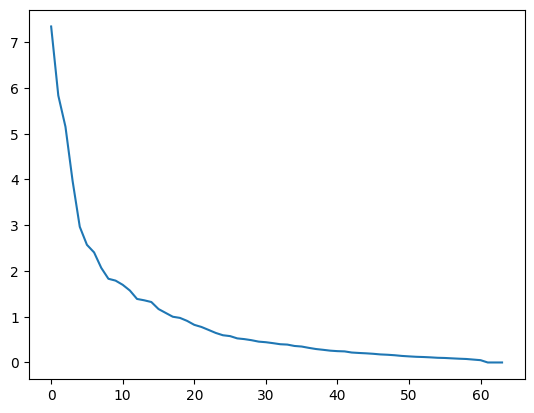

In [14]:
plt.plot(pca.explained_variance_)

### 2.3 설명된 분산의 비율  
설명된 분산은 비율로도 표현할 수 있음

In [15]:
pca.explained_variance_ratio_

array([1.20339161e-01, 9.56105440e-02, 8.44441489e-02, 6.49840791e-02,
       4.86015488e-02, 4.21411987e-02, 3.94208280e-02, 3.38938092e-02,
       2.99822101e-02, 2.93200255e-02, 2.78180546e-02, 2.57705509e-02,
       2.27530332e-02, 2.22717974e-02, 2.16522943e-02, 1.91416661e-02,
       1.77554709e-02, 1.63806927e-02, 1.59646017e-02, 1.48919119e-02,
       1.34796957e-02, 1.27193137e-02, 1.16583735e-02, 1.05764660e-02,
       9.75315947e-03, 9.44558990e-03, 8.63013827e-03, 8.36642854e-03,
       7.97693248e-03, 7.46471371e-03, 7.25582151e-03, 6.91911245e-03,
       6.53908536e-03, 6.40792574e-03, 5.91384112e-03, 5.71162405e-03,
       5.23636803e-03, 4.81807586e-03, 4.53719260e-03, 4.23162753e-03,
       4.06053070e-03, 3.97084808e-03, 3.56493303e-03, 3.40787181e-03,
       3.27835335e-03, 3.11032007e-03, 2.88575294e-03, 2.76489264e-03,
       2.59174941e-03, 2.34483006e-03, 2.18256858e-03, 2.03597635e-03,
       1.95512426e-03, 1.83318499e-03, 1.67946387e-03, 1.61236062e-03,
      

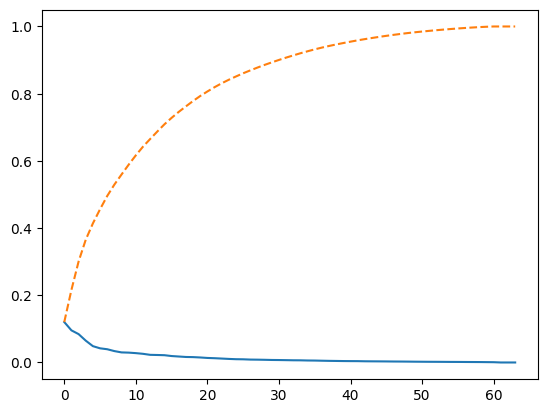

In [16]:
plt.plot(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_.cumsum(), linestyle="--")

## 3. 제한된 PCA
앞의 실습에서는 데이터의 모든 분산을 분리해서 사용함  
그런데 실제로 사용할 때는 개수를 지정하거나 설명되는 분산을 제한하는 방식으로 사용함  


### 3.1 비율로 사용하는 방법  
`n_components` argument는 int 와 float를 입력으로 받음  
0~1 사이가 들어올 경우 설명된 분산이 해당 값에 도달할 때까지 주성분을 선택

In [17]:
ratio_pca = PCA(n_components=0.8)
ratio_pca.fit(scaled_data)

PCA(n_components=0.8)

In [18]:
ratio_pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 ])

In [19]:
ratio_pca.explained_variance_ratio_.cumsum()

array([0.12033916, 0.21594971, 0.30039385, 0.36537793, 0.41397948,
       0.45612068, 0.49554151, 0.52943532, 0.55941753, 0.58873755,
       0.61655561, 0.64232616, 0.66507919, 0.68735099, 0.70900328,
       0.72814495, 0.74590042, 0.76228111, 0.77824572, 0.79313763,
       0.80661732])

이 때 선택된 주성분은 21개

In [20]:
ratio_pca.n_components_

21

### 3.2 개수를 지정해서 사용하는 방법  
`n_components` argument의 값을 int 값으로 1보다 큰 값을 줄 경우에는 지정된 개수만큼의 주성분을 계산함  

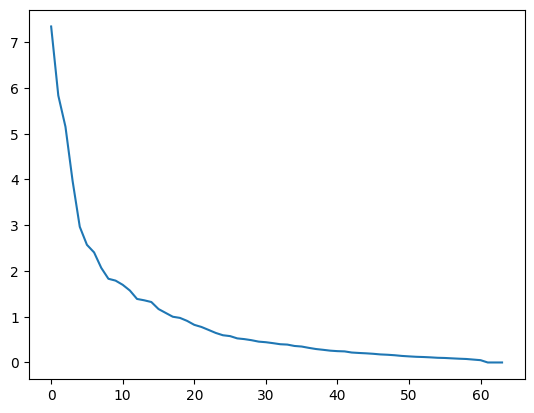

In [21]:
plt.plot(pca.explained_variance_)

예를 들어 elbow point인 8개의 주성분만 선택하려고 하는 경우  

In [23]:
n_comp_pca = PCA(n_components=8)
n_comp_pca.fit(scaled_data)

PCA(n_components=8)

In [24]:
n_comp_pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444414, 0.06498392, 0.04860127,
       0.04214067, 0.03941842, 0.03388898])

In [25]:
n_comp_pca.explained_variance_ratio_.cumsum()

array([0.12033916, 0.2159497 , 0.30039384, 0.36537776, 0.41397902,
       0.45611969, 0.49553812, 0.52942709])

In [27]:
n_comp_pca.n_components_

8

### 3.3 시각화  
PCA를 이용해 데이터를 시각화 하는 방법에 대해 알아보기  
사람이 인식할 수 있는 차원의 크기는 최대 3차원이므로 보통 2차원 또는 3차원으로 데이터를 축소한 후 시각화를 진행함  
2차원으로 차원 축소는 주성분의 개수를 2개로, 3차원으로 차원 축소는 주성분의 개수를 3개로 하면 됨  

In [28]:
viz_pca = PCA(n_components=2)
viz_pca_latent = viz_pca.fit_transform(scaled_data)

In [29]:
def visualize_latent_space_with_label(latent):
  for label in np.unique(target):
    index = target == label
    component_1 = latent[index, 0]
    component_2 = latent[index, 1]
    plt.scatter(component_1, component_2, c=f"C{label}", label=label)
  plt.legend()

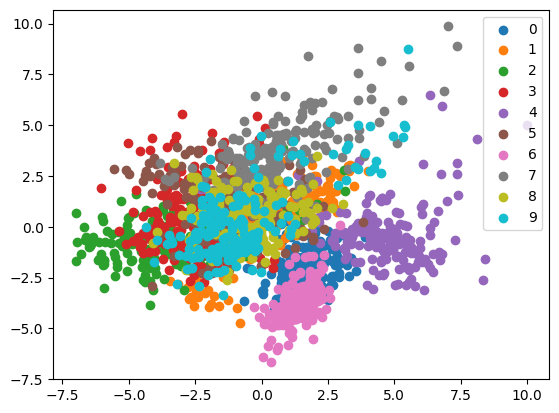

In [30]:
visualize_latent_space_with_label(viz_pca_latent)

## 4. LDA
LDA의 전체적인 과정은 PCA와 유사함  
다만 학습할 때 label을 준다는 점만 다름 (LDA는 지도학습)


### 4.1 학습

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

In [32]:
lda.fit(scaled_data, target)

LinearDiscriminantAnalysis()

### 4.2 설명된 분산  
LDA는 eigenvalue와 같이 분산의 크기를 나타내는 값은 없음  
설명된 분산의 ratio만 확인 가능

In [33]:
lda.explained_variance_ratio_

array([0.28912041, 0.18262788, 0.16962345, 0.1167055 , 0.08301253,
       0.06565685, 0.04310127, 0.0293257 , 0.0208264 ])

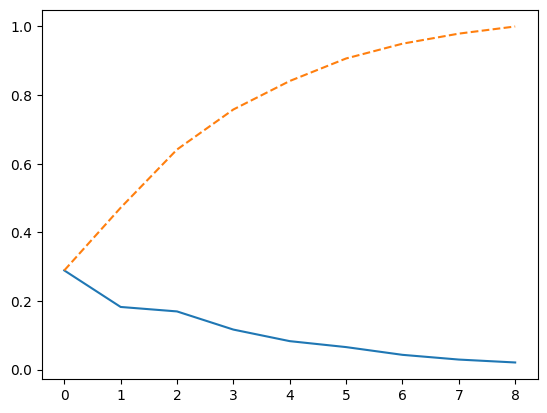

In [34]:
plt.plot(lda.explained_variance_ratio_)
plt.plot(lda.explained_variance_ratio_.cumsum(), linestyle="--")

### 4.3 시각화

In [35]:
viz_lda = LinearDiscriminantAnalysis(n_components=2)
viz_lda_latent = viz_lda.fit_transform(scaled_data, target)

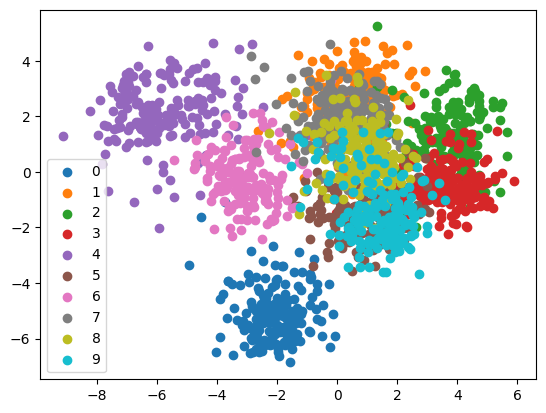

In [37]:
visualize_latent_space_with_label(viz_lda_latent)

## 4. T-SNE
T-SNE의 전체적인 과정은 PCA와 유사  
다만 T-SNE는 분산을 이용한 방식이 아니기 때문에 설명된 분산은 없음  

In [38]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

In [39]:
tsne.fit(scaled_data)

TSNE()

### 4.1 시각화

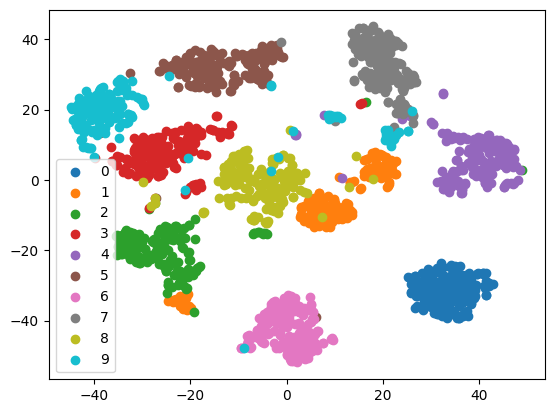

In [43]:
tsne_latent = tsne.fit_transform(scaled_data)
visualize_latent_space_with_label(tsne_latent)

## 5. 마무리


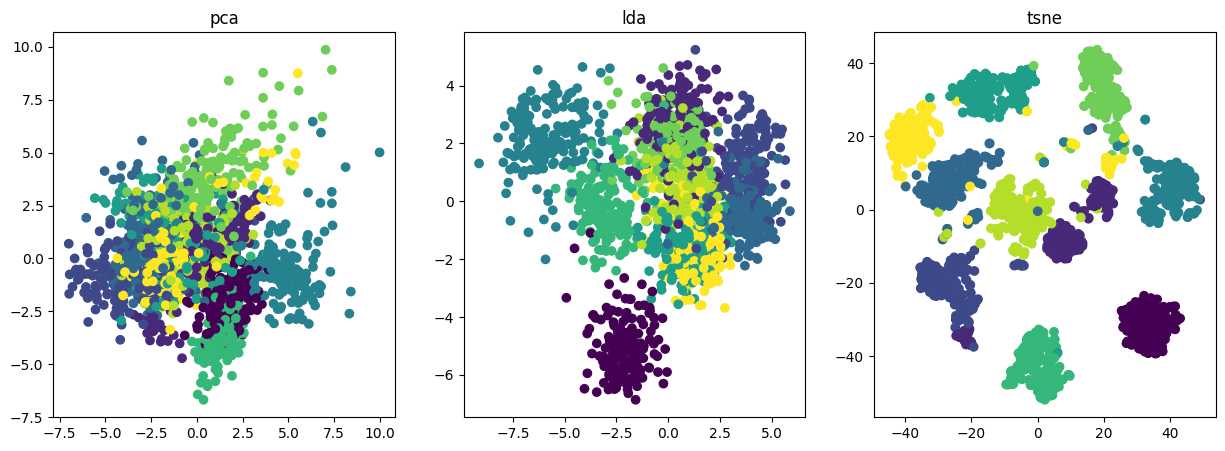

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
latents = [
    ("pca", viz_pca_latent),
    ("lda", viz_lda_latent),
    ("tsne", tsne_latent)
]
for idx, (name, latent) in enumerate(latents):
  ax = axes[idx]
  ax.scatter(latent[:, 0], latent[:, 1], c=target)
  ax.set_title(name)